In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from numpy import genfromtxt

In [2]:
def get_rows(file):
    my_data = genfromtxt(file,delimiter=',',skip_header=1)

    times,cells = np.array(zip(*my_data))

    rows = []
    for cell in set(cells):
       rows.append(times[np.where(cells == cell)]) 
    return rows

mc_rows = get_rows(file = 'Urban Burton 2014 6A mc-points.csv')
tc_rows = get_rows(file = 'Urban Burton 2014 6B tc-points.csv')

In [3]:
def spike_count(row, start_t,end_t):
    row_count = 0

    for t in row:
        if t >= start_t and t < end_t:
            row_count += 1
            
    return row_count

In [4]:
def get_counts(rows):
    samples = np.linspace(0,2000,5,dtype=int,endpoint=True)
    counts = []
    for row in rows:
        row_counts = []
        for s, sample in enumerate(samples):
            if s < len(samples)-1:
                row_counts.append(spike_count(row, sample,samples[s+1]))

        counts.append(row_counts)

    return samples[:-1], counts

samples, mc_counts = get_counts(mc_rows)
samples, tc_counts = get_counts(tc_rows)

samples, mc_counts[0]

(array([   0,  500, 1000, 1500]), [12, 8, 6, 5])

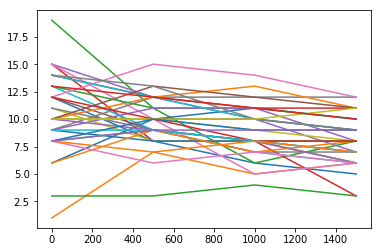

In [5]:
counts = mc_counts

plt.figure()
for count in counts:
    plt.plot(samples, count, '-')
plt.show()

In [6]:
def fit(samples, counts):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit

    def func(x, h, t, s):
        return h * np.exp(-x/t) + s

    x = samples

    popts = []

    plt.figure()
    for count in counts:
        yn = np.array(count)        
        popt, pcov = curve_fit(func, x, yn,bounds=([-10,0,0],[20,2000,20]))
        popts.append(popt)

        plt.plot(x, yn, 'o', label="Original Noised Data")
        plt.plot(x, func(x, *popt))#, 'r-', label="Fitted Curve")

    plt.show()
    
    return np.array(zip(*popts))

# Mitral Cell Adaptation

In [7]:
s = np.array([c[0]*1.0 for c in mc_counts])
e = np.array([c[-1]*1.0 for c in mc_counts])
np.mean((s-e)/s),np.std((s-e)/s)

(0.04065493821132919, 0.9169301330914839)

In [8]:
s

array([12.,  1., 19., 15., 15., 12., 15.,  9., 11., 13.,  6., 10., 13.,
       14.,  9., 10., 12., 11., 10., 14.,  9.,  6.,  8., 12., 10., 10.,
        8., 14., 10.,  9.,  8.,  8.,  3., 13.,  8.])

In [9]:
e

array([ 5.,  6.,  8.,  3.,  7.,  6.,  6., 12.,  6.,  6., 10., 11., 10.,
       11.,  8.,  9., 12.,  7.,  8.,  9.,  7.,  8.,  8.,  8.,  6., 11.,
        6.,  9., 11.,  7.,  9.,  7.,  3., 10.,  9.])

In [10]:
(s-e)/s

array([ 0.58333333, -5.        ,  0.57894737,  0.8       ,  0.53333333,
        0.5       ,  0.6       , -0.33333333,  0.45454545,  0.53846154,
       -0.66666667, -0.1       ,  0.23076923,  0.21428571,  0.11111111,
        0.1       ,  0.        ,  0.36363636,  0.2       ,  0.35714286,
        0.22222222, -0.33333333,  0.        ,  0.33333333,  0.4       ,
       -0.1       ,  0.25      ,  0.35714286, -0.1       ,  0.22222222,
       -0.125     ,  0.125     ,  0.        ,  0.23076923, -0.125     ])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 15., 18.]),
 array([-5.  , -4.42, -3.84, -3.26, -2.68, -2.1 , -1.52, -0.94, -0.36,
         0.22,  0.8 ]),
 <a list of 10 Patch objects>)

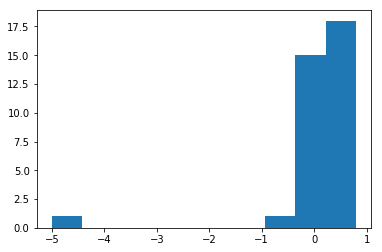

In [11]:
plt.hist((s-e)/s)

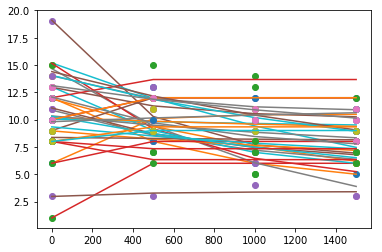

In [12]:
h,t,s = fit(samples,mc_counts)

(27.070241348833783, 38.20530026772147, 35)

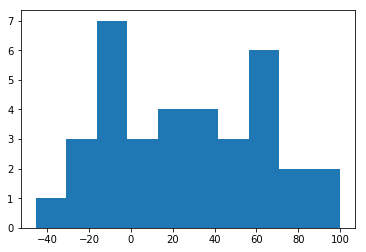

In [13]:
val = h/(s+np.abs(h))*100
plt.hist(val)
np.mean(val),np.std(val),np.count_nonzero(val)

# Tufted Cell Adaptation

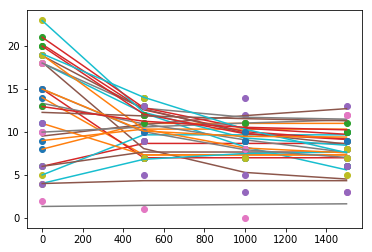

In [14]:
h,t,s = fit(samples,tc_counts)

(28.52983430736329, 41.72009775793869, 28)

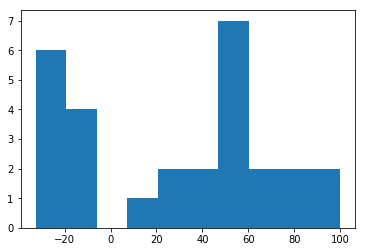

In [15]:
val = h/(s+np.abs(h))*100
plt.hist(val)
np.mean(val),np.std(val),np.count_nonzero(val)

In [16]:
from pandas import DataFrame
DataFrame([h,s,s+h,t])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,6.666669,-2.667377,13.882721,-0.581326,1.802387e+01,-3.000284,8.000032,-6.040894,6.581034,-4.666649,...,-2.691832,-3.698569,11.578957,11.130506,1.854585,8.618114,1.910145e+01,5.596853,2.914231,-0.333335
1,7.333333,8.666832,4.230229,1.915313,5.346895e-21,11.000084,6.999968,15.565763,11.439751,9.666661,...,12.673111,7.718499,7.383864,8.858561,10.425039,6.375236,6.381698e-21,9.396497,10.042872,4.333334
2,14.000001,5.999455,18.112949,1.333988,1.802387e+01,7.999800,15.000000,9.524869,18.020785,5.000012,...,9.981279,4.019930,18.962820,19.989067,12.279624,14.993350,1.910145e+01,14.993350,12.957103,3.999999
3,19.892608,0.193230,389.071141,2000.000000,1.280862e+03,0.133880,44.723481,2000.000000,313.352867,16.480410,...,2000.000000,354.303676,365.264245,403.910787,2000.000000,584.341733,1.624887e+03,242.884544,567.308937,0.404594
